## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

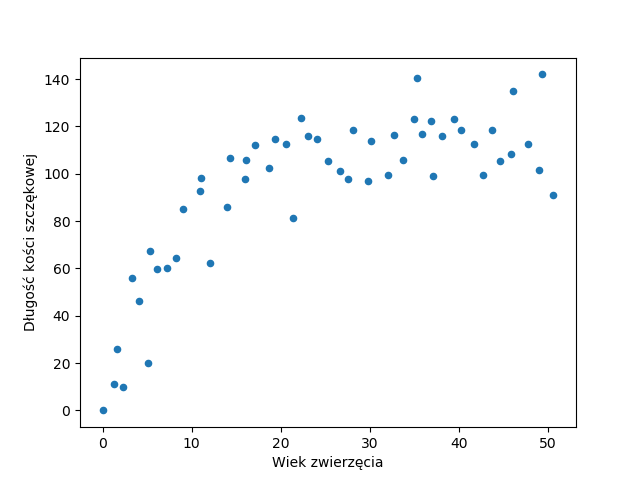

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [2]:
import numpy as np

'''
input:
x - wartość zmiennej niezależnej
n - stopień wielomianu

output:
out: [] - lista o długości n z kolejnymi potęgami wejściowej cechy x
'''


def transform_to_polynomial_feature(x: np.ndarray, n: int) -> np.ndarray:
    out = np.column_stack([x**i for i in range(1, n + 1)])
    return out

### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

In [5]:
from typing import Tuple, List

def learn_and_fit_multi(X: np.ndarray, y: np.ndarray, epochs: int = 1000, alpha: float = 0.01, tolerance: float = 1e-5) -> Tuple[np.ndarray, List[np.ndarray], List[float]]:
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    betas = np.random.uniform(0, 0.001, size=X_augmented.shape[1])

    beta_history = []
    error_history = []

    for epoch in range(epochs):
        predictions = X_augmented.dot(betas)
        error = (1 / (2 * len(y))) * np.sum((predictions - y) ** 2)

        if np.isnan(error) or np.isinf(error):
            print(f" STOP: Niestabilność numeryczna w epoce {epoch}")
            break

        beta_history.append(betas.copy())
        error_history.append(error)

        if epoch > 0 and abs(error_history[-1] - error_history[-2]) < tolerance:
            print(f" Early stopping w epoce {epoch}")
            break

        gradient = (1 / len(y)) * X_augmented.T.dot(predictions - y)
        betas -= alpha * gradient

    b0 = np.array([b[0] for b in beta_history])
    other_betas = np.array([b[1:] for b in beta_history])
    
    return b0, other_betas, error_history


 Early stopping w epoce 800
[24.77022566]
 Early stopping w epoce 14145
[ 85.25510328 -62.583107  ]
 Early stopping w epoce 191552
[ 136.06802924 -193.63238624   83.1508197 ]
 Early stopping w epoce 99429
[ 119.35363605 -115.10777665  -33.72641943   55.21059564]


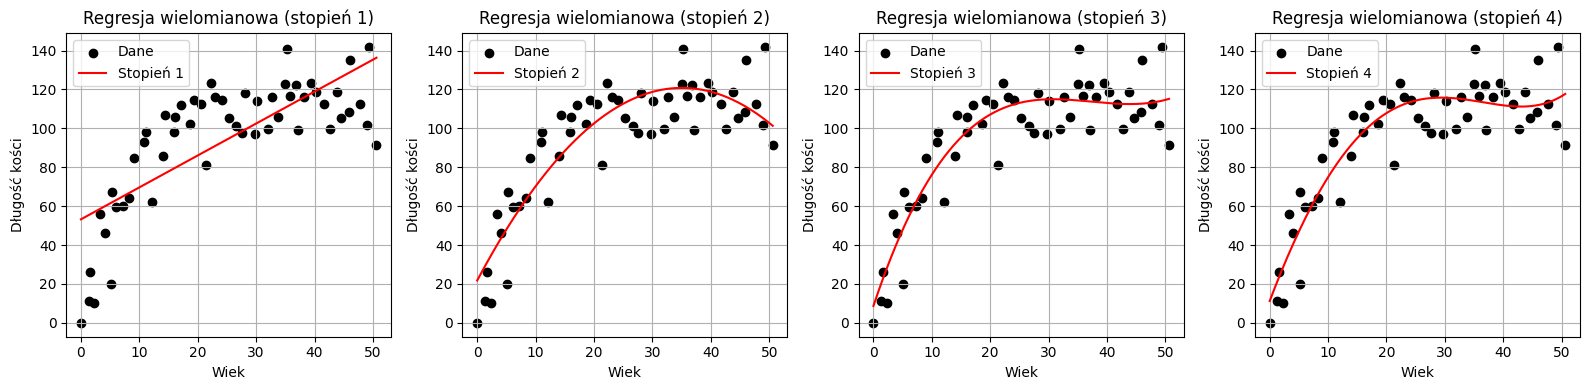

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./jaws.csv")
x = df["age"].values.reshape(-1, 1)
y = df["bone"].values

degrees = [1, 2, 3, 4]

plt.figure(figsize=(16, 4))

for i, degree in enumerate(degrees):
    X_poly = transform_to_polynomial_feature(x.flatten(), degree)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    b0, betas, errors = learn_and_fit_multi(X_scaled, y, epochs=1000000, alpha=0.01)

    x_grid = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
    X_grid_poly = transform_to_polynomial_feature(x_grid.flatten(), degree)
    X_grid_scaled = scaler.transform(X_grid_poly)

    final_betas = np.concatenate([[b0[-1]], betas[-1]])
    y_pred = np.dot(np.c_[np.ones(X_grid_scaled.shape[0]), X_grid_scaled], final_betas)

    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(x, y, color="black", label="Dane")
    plt.plot(x_grid, y_pred, color="red", label=f"Stopień {degree}")
    plt.title(f"Regresja wielomianowa (stopień {degree})")
    plt.xlabel("Wiek")
    plt.ylabel("Długość kości")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


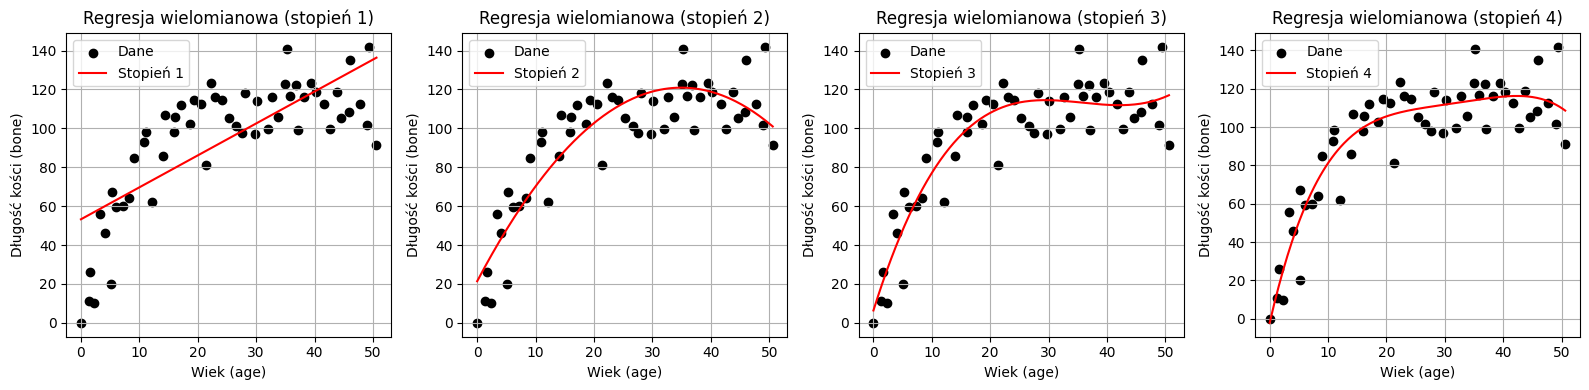

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("./jaws.csv")
x = df['age'].values.reshape(-1, 1)   
y = df['bone'].values                 

degrees = [1, 2,3, 4]

plt.figure(figsize=(16, 4))

for i, degree in enumerate(degrees):
    X_poly = transform_to_polynomial_feature(x.flatten(), degree)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    model = LinearRegression()
    model.fit(X_scaled, y)

    x_grid = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
    x_grid_poly = transform_to_polynomial_feature(x_grid.flatten(), degree)
    x_grid_scaled = scaler.transform(x_grid_poly)
    y_pred = model.predict(x_grid_scaled)

    plt.subplot(1, len(degrees), i+1)
    plt.scatter(x, y, color='black', label='Dane')
    plt.plot(x_grid, y_pred, color='red', label=f'Stopień {degree}')
    plt.title(f'Regresja wielomianowa (stopień {degree})')
    plt.xlabel('Wiek (age)')
    plt.ylabel('Długość kości (bone)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Zadanie 3

Porównaj czasy działania algorytmu dla danych przed i po normalizacji

-------------
 Early stopping w epoce 99429
CZASY UCZENIA:
Bez normalizacji:     13.8802 sekund
Z normalizacją:       0.4661 sekund


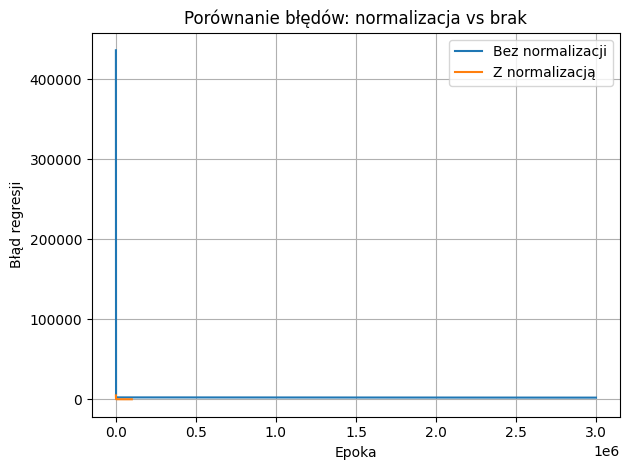

In [26]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("./jaws.csv")
x = df['age'].values.reshape(-1, 1)
y = df['bone'].values

degree = 4


X_poly_raw = transform_to_polynomial_feature(x.flatten(), degree)

start_raw = time.time()
b0_raw, betas_raw, errors_raw = learn_and_fit_multi(X_poly_raw, y, epochs=3000000, alpha=1e-15, tolerance=1e-18)
end_raw = time.time()
raw_time = end_raw - start_raw
print("-------------")

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_raw)

start_scaled = time.time()
b0_scaled, betas_scaled, errors_scaled = learn_and_fit_multi(X_poly_scaled, y, epochs=3000000, alpha=0.01, tolerance=1e-5)
end_scaled = time.time()
scaled_time = end_scaled - start_scaled


print("CZASY UCZENIA:")
print(f"Bez normalizacji:     {raw_time:.4f} sekund")
print(f"Z normalizacją:       {scaled_time:.4f} sekund")

plt.plot(errors_raw, label="Bez normalizacji")
plt.plot(errors_scaled, label="Z normalizacją")
plt.xlabel("Epoka")
plt.ylabel("Błąd regresji")
plt.title("Porównanie błędów: normalizacja vs brak")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


"Bez normalizacji" (bardzo powolny start, ale finalnie dotarł do dobrego wyniku),
"Z normalizacją" (zbiega szybciej — mniejszy błąd, mniej epok).

### Zadanie 4

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

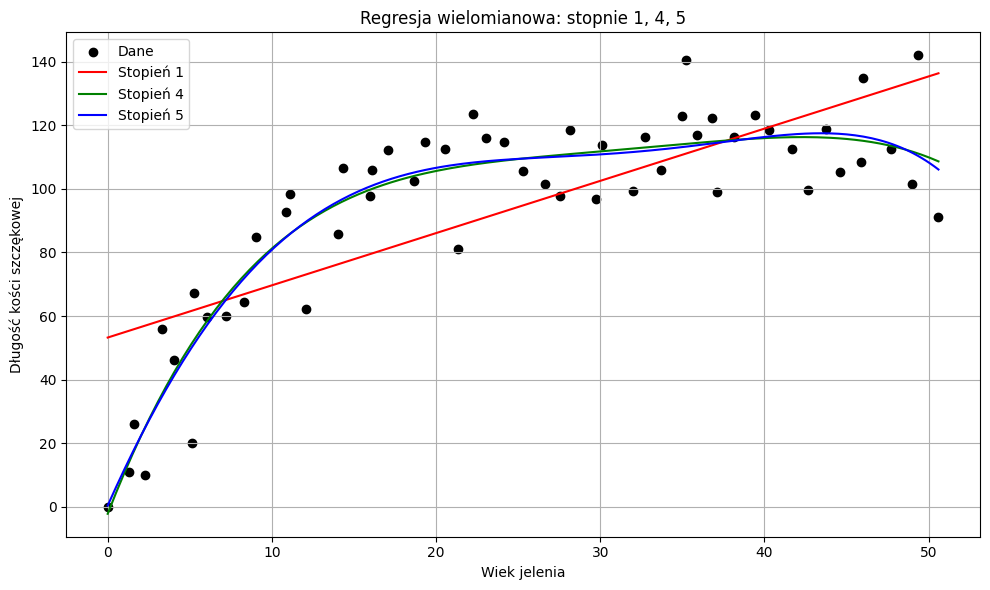

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


df = pd.read_csv("./jaws.csv")
x = df["age"].values.reshape(-1, 1)
y = df["bone"].values

x_grid = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)

degrees = [1, 4, 5]
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Dane')

for degree, color in zip(degrees, colors):
    X_poly = transform_to_polynomial_feature(x.flatten(), degree)
    X_grid_poly = transform_to_polynomial_feature(x_grid.flatten(), degree)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)
    X_grid_scaled = scaler.transform(X_grid_poly)

    model = LinearRegression()
    model.fit(X_scaled, y)
    y_pred = model.predict(X_grid_scaled)

    plt.plot(x_grid, y_pred, color=color, label=f'Stopień {degree}')

plt.title("Regresja wielomianowa: stopnie 1, 4, 5")
plt.xlabel("Wiek jelenia")
plt.ylabel("Długość kości szczękowej")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Im wyższy stopień wielomianu, tym model może być bardziej elastyczny.
Jednak po pewnym punkcie (tu: stopień 4), dodatkowe stopnie nie poprawiają dopasowania, a mogą je pogorszyć przez przeuczenie.
Stopień 4 wydaje się najlepszym kompromisem.

### Zadanie 5

Odszukaj dowolny inny zbiór danych, dokonaj jego wizualizacji i przetestuj działania algorytmu

/var/folders/n3/nq1zfdyx6552_hgpj67175280000gn/T/ipykernel_5114/422930063.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


=== PORÓWNANIE MODELI ===

 Early stopping w epoce 1699
Stopień 1:
   sklearn        ➤ MSE = 46.14
   własna metoda  ➤ MSE = 46.14
 Early stopping w epoce 235235
Stopień 2:
   sklearn        ➤ MSE = 35.37
   własna metoda  ➤ MSE = 35.37
Stopień 3:
   sklearn        ➤ MSE = 34.45
   własna metoda  ➤ MSE = 34.88
Stopień 4:
   sklearn        ➤ MSE = 39.58
   własna metoda  ➤ MSE = 34.28
Stopień 5:
   sklearn        ➤ MSE = 32.51
   własna metoda  ➤ MSE = 34.42


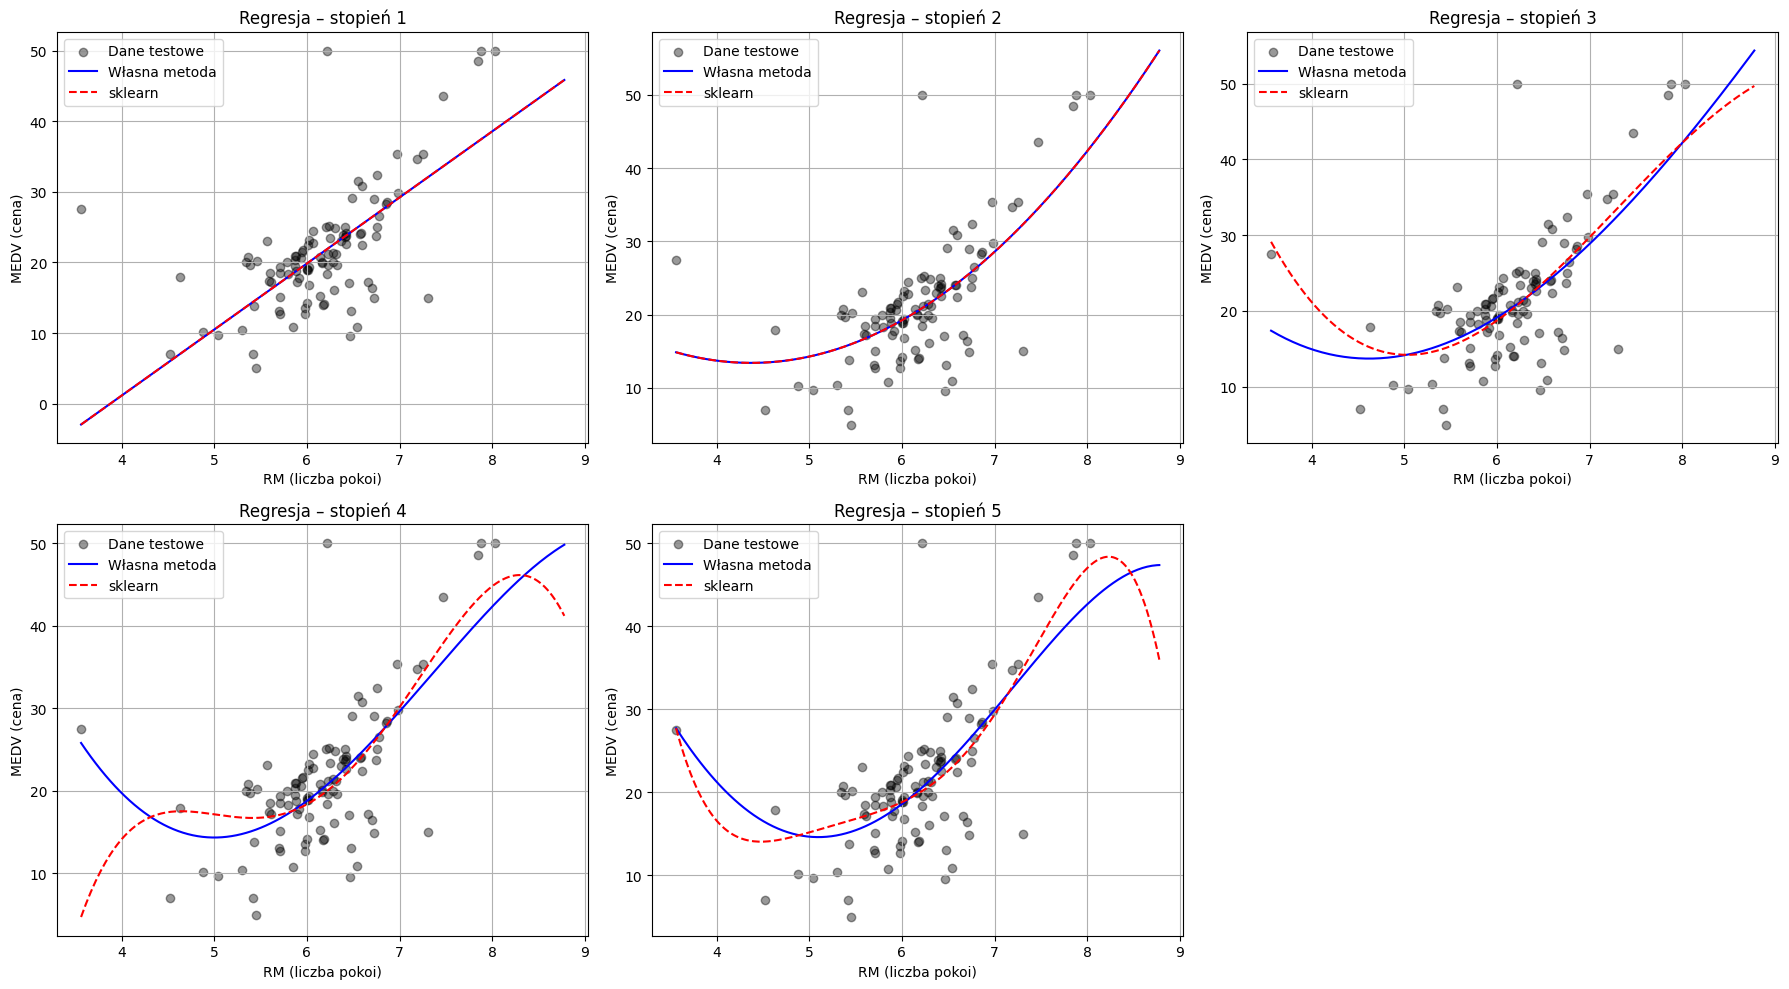

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df = pd.read_csv(url, delim_whitespace=True, names=columns)

X = df[["RM"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4, 5]

print("=== PORÓWNANIE MODELI ===\n")

plt.figure(figsize=(18, 10))

for i, degree in enumerate(degrees, start=1):
    X_poly_train = transform_to_polynomial_feature(X_train, degree)
    X_poly_test = transform_to_polynomial_feature(X_test, degree)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_poly_train)
    X_test_scaled = scaler.transform(X_poly_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred_sklearn = model.predict(X_test_scaled)
    mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

    b0, betas, errors = learn_and_fit_multi(X_train_scaled, y_train, epochs=1000000, alpha=1e-2,tolerance=1e-15)
    X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
    beta_vec = np.concatenate(([b0[-1]], betas[-1]))
    y_pred_own = X_test_bias @ beta_vec
    mse_own = mean_squared_error(y_test, y_pred_own)

    print(f"Stopień {degree}:")
    print(f"   sklearn        ➤ MSE = {mse_sklearn:.2f}")
    print(f"   własna metoda  ➤ MSE = {mse_own:.2f}")

    x_grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    x_poly_grid = transform_to_polynomial_feature(x_grid, degree)
    x_grid_scaled = scaler.transform(x_poly_grid)

    x_grid_bias = np.c_[np.ones(x_grid_scaled.shape[0]), x_grid_scaled]
    y_grid_pred_own = x_grid_bias @ beta_vec
    y_grid_pred_sklearn = model.predict(x_grid_scaled)

    plt.subplot(2, 3, i)
    plt.scatter(X_test, y_test, color='black', alpha=0.4, label="Dane testowe")
    plt.plot(x_grid, y_grid_pred_own, color='blue', label="Własna metoda")
    plt.plot(x_grid, y_grid_pred_sklearn, color='red', linestyle="--", label="sklearn")
    plt.title(f"Regresja – stopień {degree}")
    plt.xlabel("RM (liczba pokoi)")
    plt.ylabel("MEDV (cena)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


/var/folders/n3/nq1zfdyx6552_hgpj67175280000gn/T/ipykernel_5114/798892182.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


=== REGRESJA WIELOMIANOWA DLA WIELU ZMIENNYCH ===


Stopień 1
 Early stopping w epoce 3170
sklearn        ➤ MSE = 27.11
 własna metoda  ➤ MSE = 27.11


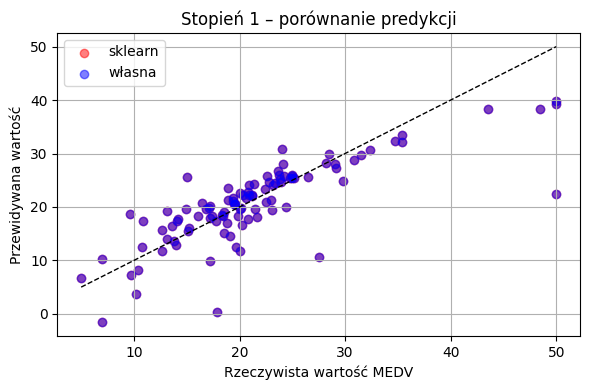


Stopień 2
sklearn        ➤ MSE = 16.29
 własna metoda  ➤ MSE = 16.29


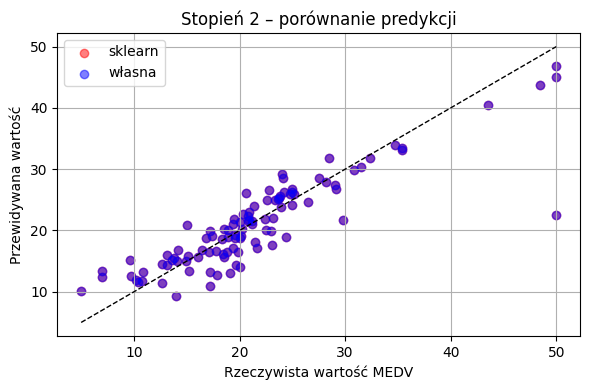


Stopień 3
sklearn        ➤ MSE = 28.38
 własna metoda  ➤ MSE = 15.96


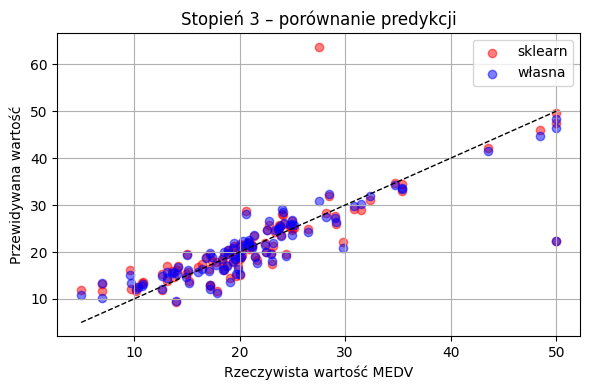

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df = pd.read_csv(url, delim_whitespace=True, names=columns)

X = df[["RM", "LSTAT", "PTRATIO"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3]

print("=== REGRESJA WIELOMIANOWA DLA WIELU ZMIENNYCH ===\n")

for degree in degrees:
    print(f"\nStopień {degree}")

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_poly_train)
    X_test_scaled = scaler.transform(X_poly_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred_sklearn = model.predict(X_test_scaled)
    mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

    b0, betas, errors = learn_and_fit_multi(X_train_scaled, y_train, epochs=1000000, alpha=1e-2,tolerance=1e-15)
    X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
    beta_vec = np.concatenate(([b0[-1]], betas[-1]))
    y_pred_own = X_test_bias @ beta_vec
    mse_own = mean_squared_error(y_test, y_pred_own)

    print(f"sklearn        ➤ MSE = {mse_sklearn:.2f}")
    print(f" własna metoda  ➤ MSE = {mse_own:.2f}")


    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred_sklearn, color='red', label='sklearn', alpha=0.5)
    plt.scatter(y_test, y_pred_own, color='blue', label='własna', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
    plt.xlabel("Rzeczywista wartość MEDV")
    plt.ylabel("Przewidywana wartość")
    plt.title(f"Stopień {degree} – porównanie predykcji")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Zadanie 6

Zaproponuj metrykę oceny skuteczności działania algorytmu. Można wzorować się na metodach dostępnych pod odnośnikiem: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

1. MSE – Mean Squared Error.
Im mniejszy MSE, tym lepiej.
Bardzo duże błędy są silnie karane (bo błąd jest podnoszony do kwadratu).

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

32.51475117225952

2. RMSE – Root Mean Squared Error . 
To po prostu pierwiastek z MSE – ma tę samą jednostkę co y.

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(5.702170742117384)

3. MAE – Mean Absolute Error . 
Średnia z wartości bezwzględnych błędów (nie podnosi ich do kwadratu):

In [56]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

3.87779630294417

4. R² – współczynnik determinacji .
Określa, jak dobrze model tłumaczy zmienność danych.
Wartość:

1.0 – idealne dopasowanie ,

0.0 – model nic nie tłumaczy,

< 0 – model gorszy niż losowe przewidywanie 

In [57]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.5566197491655995


MSE	gdy chcesz mocno karać duże błędy
RMSE	gdy chcesz łatwiej interpretować wynik
MAE	gdy nie chcesz wzmacniać wpływu dużych błędów
R²	do ogólnej oceny dopasowania modelu